### Clean and Join Data  
Keeping tot in table format to be exported to GIS

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

df19 = pd.read_csv( r"C:\Users\csucuogl\Desktop\WORK\MISC_TEST\Replica_Transit\2019_0401-1018_dest.csv" )
df20 = pd.read_csv( r"C:\Users\csucuogl\Desktop\WORK\MISC_TEST\Replica_Transit\2020_0401-1018_dest.csv" )

df19['destination'] = [r.split(':')[4] for i,r in df19['destination'].iteritems()]
df19 = df19.drop(['date_from','date_to','hour_from','hour_to','percent_bike','percent_walk'] , axis = 1 )
df20['destination'] = [r.split(':')[4] for i,r in df20['destination'].iteritems()]
df20 = df20.drop(['date_from','date_to','hour_from','hour_to','percent_bike','percent_walk'] , axis = 1 )

df19 = df19.set_index('destination')
df20 = df20.set_index('destination')

df19.columns = ['bike19','walk19','transit19','auto19','total19']
df20.columns = ['bike20','walk20','transit20','auto20','total20' ]

df = df19.join( df20  )

df.head(5)


,destination,biking_count,walking_count,transit_count,auto_count,total_count
0,36047070202,117.870500,461.217568,122585.052085,322.985048,3.031650e+05
1,36081091800,99.218638,451.103922,14911.196191,187705.558897,2.536709e+05
2,36005031900,43.870904,12471.997750,13405.010001,25359.612306,6.701430e+04
3,36081021900,844.307929,163422.951213,388418.983759,2788.103604,1.096277e+06
4,36085022800,443.325574,1407.717751,36812.754292,462660.378863,5.567678e+05


### Calculate Change  
* Bike Change
* Total Change
* Bike Change in comparion to Total Change.


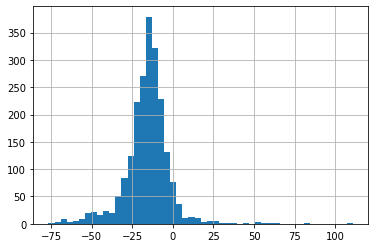

In [210]:
#Change

df['bike19%'] = (df['bike19']/df['total19'])*100
df['bike20%'] = (df['bike20']/df['total20'])*100

df['transit19%'] = (df['transit19']/df['total19'])*100
df['transit20%'] = (df['transit20']/df['total20'])*100


df['total_change'] = ((df['total20'] - df['total19'])/df['total19']) * 100
df['bike_change'] = (( df['bike20%'] - df['bike19%'] ) / df['bike19%'])*100
df['tr_change'] = (( df['transit20%'] - df['transit19%'] ) / df['transit19%'])*100


df['total_change'].hist( bins = 50)

In [142]:
mhi = pd.read_csv( r"C:\Users\csucuogl\Desktop\DATA\NYC\Census_Data\MedianIncome_2018_Tract.csv" )
mhi = mhi[['Tract_no','Estimate!!Median income in the past 12 months --!!Total']]
mhi.columns = ['Tract_no','mhi']
mhi['Tract_no'] = mhi['Tract_no'].astype(str)

mhi.head()

,Tract_no,mhi
0,36081046200,22671
1,36081045000,27346
2,36081045400,29756
3,36081045500,25080
4,36081045600,26723


In [251]:
dfm = df.join( mhi.set_index('Tract_no') )
dfm = dfm[ dfm['mhi'] > -666666666 ]

dfm['boro'] = dfm.index
dfm['boro'] = dfm['boro'].str[2:5]

dfm['dest'] = dfm.index
dfm = dfm[ dfm['total_change'] < dfm['total_change'].quantile(0.98) ] #Remove Outliers

dfm['boro'] = dfm['boro'].replace('061', 'Manhattan')
dfm['boro'] = dfm['boro'].replace('085', 'Staten Is.')
dfm['boro'] = dfm['boro'].replace('047', 'Brooklyn') 
dfm['boro'] = dfm['boro'].replace('005', 'Bronx')
dfm['boro'] = dfm['boro'].replace('081', 'Queens')

dfm.head()

,bike19,walk19,transit19,auto19,total19,bike20,walk20,transit20,auto20,total20,...,tr_change,total_change,bike_total_ration,bike19%,bike20%,transit19%,transit20%,mhi,boro,dest
destination,,,,,,,,,,,,,,,,,,,,,
36005031900,43.870904,12471.997750,13405.010001,2.535961e+04,6.701430e+04,38.284661,6094.336436,5227.758090,2.468508e+04,5.507389e+04,...,-52.546295,-17.817715,-0.714646,0.065465,0.069515,20.003207,9.492263,2900,Bronx,36005031900
36047035200,2095.718750,82334.028200,928942.161300,7.914067e+05,2.299316e+06,3306.150567,92973.324621,465803.377172,8.849473e+05,2.026583e+06,...,-43.108380,-11.861499,4.869314,0.091145,0.163139,40.400804,22.984672,11296,Brooklyn,36047035200
36047069800,2584.837340,102450.946337,938307.626846,1.036763e+06,2.668633e+06,2356.152250,77451.759475,308066.697881,9.834561e+05,1.946202e+06,...,-54.980521,-27.071204,-0.326811,0.096860,0.121064,35.160610,15.829123,37974,Brooklyn,36047069800
36085029102,2552.658262,17090.712265,264632.989174,1.811878e+06,2.575948e+06,2177.775541,12766.538661,73629.217693,1.743844e+06,2.339803e+06,...,-69.368798,-9.167312,-1.601993,0.099096,0.093075,10.273228,3.146813,34698,Staten Is.,36085029102
36061011202,1589.848407,201153.301648,850184.182278,1.728606e+05,1.579260e+06,1191.564184,105443.460641,236182.496083,9.648449e+04,6.871345e+05,...,-36.152098,-56.490103,-0.443471,0.100670,0.173411,53.834331,34.372091,71719,Manhattan,36061011202


### PLOT  
Scatterplot ->  
* y = 'bike_change'
* x = 'tr_change'


In [271]:
import plotly.graph_objects as go

y = 'bike_change'
x = 'tr_change'
colors = ['#00cc9d','#fb5607','#ff006e','#8338ec','#3a86ff']

fig = go.Figure()
for i,n in enumerate(dfm['boro'].unique().tolist()):
    temp = dfm[ dfm['boro'] == n ]

    fig.add_trace(go.Scatter(
        y=temp[y] , x=temp[x],
        mode='markers',
        text = temp['dest'],
        hovertemplate = '<b>%{text}</b><br>Ch. in Transit Usage: %{x:.1f}%<br>Ch. in Bike Usage: %{y:.1f}%<extra></extra>',
        marker_color= colors[i],
        name = n,
        marker=dict(
            size=temp['mhi']/10000, opacity = 0.4,
            line = dict( width = 0))
            ))

fig.add_shape( # Median X axis
    type="line",line=dict(color="LightSeaGreen",width=1),
    x0=dfm[x].median() , x1=dfm[x].median() , 
    y0=dfm[y].min(), y1=dfm[y].max(),
    )
fig.add_shape( # Median Y axis
    type="line",line=dict(color="LightSeaGreen",width=1),
    x0=dfm[x].min(), x1=dfm[x].max(),
    y0=dfm[y].median(), y1=dfm[y].median(),
    )

fig.update_xaxes( 
    title = '% Change in Transit Usage(19-20)' , 
    showgrid=True, gridwidth=0.25, gridcolor='lightgrey',zerolinecolor='black',zerolinewidth=0.5,
    range=[dfm[x].min()-1 , dfm[x].max()+1 ] )

fig.update_yaxes( 
    title = '% Change in Bike Usage (19-20)' ,
    showgrid=True, gridwidth=0.25, gridcolor='lightgrey',zerolinecolor='black',zerolinewidth=0.5,
    range=[ dfm[y].min()-5 , dfm[y].max()+5 ] )

fig.update_layout(
    legend=dict(
        title = 'Borough',
        yanchor="top" , y=0.99,
        xanchor="left" , x=0.01,
        bgcolor = 'rgba(255,255,255,0.6)'
    ))

fig.update_layout( margin=dict(l=10,r=15,t=40,b=3) , plot_bgcolor = '#e5e5e5' , title = 'Change in Bike vs. General Mobility in NYC')
fig.show()

## ORIGIN -> Purpose  
Additional data with origin as aggregating index


In [10]:
import pandas as pd
pd.set_option('display.max_columns', None)

dfo19 = pd.read_csv( r"C:\Users\csucuogl\Desktop\WORK\MISC_TEST\Replica_Transit\origin-19.csv" )
dfo20 = pd.read_csv( r"C:\Users\csucuogl\Desktop\WORK\MISC_TEST\Replica_Transit\origin-20.csv" )

dfo19 = dfo19.drop(['date_from','date_to','hour_from','hour_to'],axis = 1)
dfo20 = dfo20.drop(['date_from','date_to','hour_from','hour_to'],axis = 1)

dfo19['origin'] = [r.split(':')[4] for i,r in dfo19['origin'].iteritems()]
dfo20['origin'] = [r.split(':')[4] for i,r in dfo20['origin'].iteritems()]

dfo19 = dfo19.set_index('origin')
dfo20 = dfo20.set_index('origin')

dfo = dfo19.join( dfo20 , rsuffix = '_20' , lsuffix = '_19')

dfo.head()

,biking_count_19,walking_count_19,transit_count_19,auto_count_19,work_19,home_19,recreation_19,eat_19,shop_19,social_19,total_count_19,percent_bike_19,percent_walk_19,biking_count_20,walking_count_20,transit_count_20,auto_count_20,work_20,home_20,recreation_20,eat_20,shop_20,social_20,total_count_20,percent_bike_20,percent_walk_20
origin,,,,,,,,,,,,,,,,,,,,,,,,,,
36081091800,95.732206,446.674379,7990.245607,221337.353502,18865.166414,79638.075234,30937.996133,48533.301385,32802.712619,1219.134725,229870.006993,0.041646,0.194316,72.826723,163.103012,5179.319392,399975.614663,43506.221086,201502.354944,41099.290044,51654.636979,42589.419129,1042.304454,405390.865798,0.017965,0.040234
36047070202,124.160387,505.875219,115362.975958,161980.843181,28994.938078,92395.360746,35057.152572,43229.188539,49523.533200,2051.458294,277973.857002,0.044666,0.181987,256.739544,954.067640,79256.774093,307252.980290,59065.569161,161300.049298,29780.561027,52141.443072,57174.260512,725.301302,387720.565905,0.066218,0.246071
36005031900,42.407499,13240.461077,11818.837515,37737.096531,13978.881214,16935.257239,4793.919350,15742.040509,6622.757511,203.943811,62838.803230,0.067486,21.070518,36.637471,8130.494337,3784.537961,37305.836899,12431.514719,20450.189292,1821.121720,6825.192222,4794.294929,31.426748,49257.507297,0.074379,16.506102
36085022800,414.068065,1419.267224,24463.533709,498220.358525,60461.591639,168510.143701,83140.511923,62130.841268,85966.756060,1424.828436,524517.229784,0.078943,0.270585,363.333013,1106.627259,6966.464540,530301.723883,88045.838339,198676.185455,77968.281154,53419.991740,76216.653968,1052.760371,538738.150896,0.067441,0.205411
36081128300,276.473371,1152.819538,23838.517202,310075.966960,30549.452513,124005.095048,55983.889128,49590.424309,44054.725198,1699.467926,335343.778768,0.082445,0.343772,422.603575,1215.651221,13852.588701,532192.685723,66486.890664,269884.505036,66802.605101,57037.542459,54586.252529,1906.363039,547683.532253,0.077162,0.221962


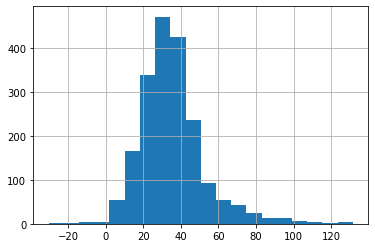

In [25]:
#Change
dfo['work19%'] = (dfo['work_19']/dfo['total_count_19'])*100
dfo['work20%'] = (dfo['work_20']/dfo['total_count_20'])*100

dfo['bike19%'] = (dfo['biking_count_19']/dfo['total_count_19'])*100
dfo['bike20%'] = (dfo['biking_count_20']/dfo['total_count_20'])*100

dfo['transit19%'] = (dfo['transit_count_19']/dfo['total_count_19'])*100
dfo['transit20%'] = (dfo['transit_count_20']/dfo['total_count_20'])*100

dfo['work_change'] = (( dfo['work20%'] - dfo['work19%'] ) / dfo['work19%'])*100
dfo['total_change'] = ((dfo['total_count_20'] - dfo['total_count_19'])/dfo['total_count_19']) * 100
dfo['bike_change'] = (( dfo['bike20%'] - dfo['bike19%'] ) / dfo['bike19%'])*100
dfo['tr_change'] = (( dfo['transit20%'] - dfo['transit19%'] ) / dfo['transit19%'])*100

#Fix
dfo['boro'] = dfo.index
dfo['boro'] = dfo['boro'].str[2:5]

dfo['dest'] = dfo.index
dfo = dfo[ dfo['total_change'] < dfo['total_change'].quantile(0.98) ] #Remove Outliers

dfo['boro'] = dfo['boro'].replace('061', 'Manhattan')
dfo['boro'] = dfo['boro'].replace('085', 'Staten Is.')
dfo['boro'] = dfo['boro'].replace('047', 'Brooklyn') 
dfo['boro'] = dfo['boro'].replace('005', 'Bronx')
dfo['boro'] = dfo['boro'].replace('081', 'Queens')

dfo['work_change'].hist( bins = 20 )

In [23]:
import plotly.graph_objects as go

y = 'bike_change'
x = 'work_change'
colors = ['#00cc9d','#fb5607','#ff006e','#8338ec','#3a86ff']

fig = go.Figure()
for i,n in enumerate(dfo['boro'].unique().tolist()):
    temp = dfo[ dfo['boro'] == n ]

    fig.add_trace(go.Scatter(
        y=temp[y] , x=temp[x],
        mode='markers',
        text = temp['dest'],
        hovertemplate = '<b>%{text}</b><br>Ch. in Transit Usage: %{x:.1f}%<br>Ch. in Bike Usage: %{y:.1f}%<extra></extra>',
        marker_color= colors[i],
        name = n,
        marker=dict(
            #size=temp['mhi']/10000, 
            opacity = 0.4,
            line = dict( width = 0))
            ))

fig.add_shape( # Median X axis
    type="line",line=dict(color="LightSeaGreen",width=1),
    x0=dfo[x].median() , x1=dfo[x].median() , 
    y0=dfo[y].min(), y1=dfo[y].max(),
    )
fig.add_shape( # Median Y axis
    type="line",line=dict(color="LightSeaGreen",width=1),
    x0=dfo[x].min(), x1=dfo[x].max(),
    y0=dfo[y].median(), y1=dfo[y].median(),
    )

fig.update_xaxes( 
    title = '% Change in Transit Usage(19-20)' , 
    showgrid=True, gridwidth=0.25, gridcolor='lightgrey',zerolinecolor='black',zerolinewidth=0.5,
    range=[dfo[x].min()-1 , dfo[x].max()+1 ] )

fig.update_yaxes( 
    title = '% Change in Bike Usage (19-20)' ,
    showgrid=True, gridwidth=0.25, gridcolor='lightgrey',zerolinecolor='black',zerolinewidth=0.5,
    range=[ dfo[y].min()-5 , dfo[y].max()+5 ] )

fig.update_layout(
    legend=dict(
        title = 'Borough',
        yanchor="top" , y=0.99,
        xanchor="left" , x=0.01,
        bgcolor = 'rgba(255,255,255,0.6)'
    ))

fig.update_layout( margin=dict(l=10,r=15,t=40,b=3) , plot_bgcolor = '#e5e5e5' , title = 'Change in Bike vs. General Mobility in NYC')
fig.show()